# "TuneRank: Predicting Spotify Song Popularity using ML & GenAI"

Music streaming platforms need to prioritize content promotion, especially in cold-start scenarios where user engagement data is unavailable. TuneRank addresses this by predicting popularity using **audio features alone** and converting predictions into **actionable promotion strategies**.


**Problem Statement**

The rapid growth of digital music platforms has made it challenging to identify which songs deserve priority in recommendations and promotions, especially during cold-start scenarios where user engagement data is unavailabl(like no of streams,likes/saves,shares,skips,marketing spend n all)

The objective of this project, **TuneRank**, is to predict whether a song belongs to **Low, Medium, or High popularity categories** using only audio features. In addition, the system aims to generate **actionable promotion recommendations** by combining machine learning predictions with generative AI, enabling data-driven decision-making for music curation and marketing teams.


The system follows a two-layer architecture:

### 1️⃣ Machine Learning Layer
- Audio features used: Danceability, Energy, Valence, Tempo, Loudness, Acousticness, etc.
- Popularity converted into **Low / Medium / High** buckets using quantile-based binning
- Model used: **Gradient Boosting Classifier**
- Output:
  - Predicted popularity class
  - Confidence score (from model probabilities)

### 2️⃣ Generative AI Layer
- Uses **Gemini API**
- Converts ML predictions into **natural-language promotion recommendations**
- Helps bridge the gap between technical predictions and business decisions


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from warnings import filterwarnings
filterwarnings('ignore')

plt.rcParams['figure.figsize']=[20,10]

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Spotify_data.csv')

df.head()

,Unnamed: 0,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Release Date,Duration (ms),Explicit,...,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,9,redrum,21 Savage,american dream,2RRYaYHY7fIIdvFlvgb5vq,52eIcoLUM25zbQupAZYoFh,87,2024-01-12,270698,True,...,0.733,2,-8.757,1,0.0488,0.00598,0.000983,0.375,0.244,172.090
1,143,Agar Tum Saath Ho,"Alka Yagnik, Arijit Singh",Tamasha,2CUXo26JAWIbQx0EVMnjpA,3hkC9EHFZNQPXrtl8WPHnX,71,2015-10-16,341055,False,...,0.519,3,-8.744,1,0.0326,0.55700,0.000268,0.172,0.415,122.925
2,15,Miles On It,"Marshmello, Kane Brown",Miles On It,5gWV4yp27HCbXJ1YLe8hQM,4pkb8SbRGeHAvdb87v9rpf,85,2024-05-03,168454,False,...,0.761,5,-4.752,1,0.0472,0.00537,0.000000,0.549,0.785,129.963
3,124,Aaj Sajeya,Goldie Sohel,Aaj Sajeya,1K1qbVYRTvD4aEYeL2187k,119XDcdbad5u5bp841vUGV,56,2021-03-30,229180,False,...,0.570,7,-10.111,1,0.0665,0.88300,0.001770,0.161,0.569,79.931
4,153,Qaafirana,"Arijit Singh, Nikhita Gandhi",Kedarnath (Original Motion Picture Soundtrack),5tr2QN1s6pREyv0Kc39Zpm,7BCp5hEiiDSmXsxsXkvYff,69,2018-11-27,341823,False,...,0.433,4,-8.958,1,0.0420,0.07220,0.000000,0.123,0.208,169.954


In [3]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [4]:
df.shape

(227, 21)

In [5]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print(' ')


Track Name
['redrum' 'Agar Tum Saath Ho' 'Miles On It' 'Aaj Sajeya' 'Qaafirana'
 'Just Wanna Rock' 'Tu Mile Dil Khile' 'Edge of Seventeen' 'Call It Love'
 "It's Not Right But It's Okay" 'Sajni (From "Laapataa Ladies")' 'Zaalima'
 'Bandeya - From "Dil Juunglee"' 'Overdrive (feat. Norma Jean Martine)'
 'SICKO MODE' 'Ve Haaniyaan' 'Soch Na Sake' 'Apna Bana Le' 'Tarantella'
 'BABY HELLO' 'Pal' 'Angaaron (From "Pushpa 2 The Rule") [HINDI]'
 'Tumhe Kitna Pyaar Karte (From "Bawaal")' 'Baarish' 'Save Your Tears'
 'Dekhha Tenu (From "Mr. And Mrs. Mahi")' 'Lay Low' 'Marianela (Que Pasa)'
 'Mere Sohneya' 'Tera Ban Jaunga' 'leavemealone' 'Drugs From Amsterdam'
 'Tell Ur Girlfriend' 'Tu Kya Jaane'
 'Agar Ho Tum (From "Mr. And Mrs. Mahi")' 'Rang Lageya'
 'Tum Se (From "Teri Baaton Mein Aisa Uljha Jiya")' 'Tujhko Jo Paaya'
 'Satranga (From "ANIMAL")' 'La Jumpa' 'Kalank - Bonus Track'
 'Raataan Lambiyan (From "Shershaah")' 'In My Bones'
 'Tu Hain Toh (From "Mr. And Mrs. Mahi")' 'MONEY ON THE DASH' 'LE

In [6]:
df.isnull().sum().sum()

np.int64(0)

**Data Preprocessing**


-Removing duplicate values

-Insepecting feature desitribution and ranges of numnerical and categorical variables

-Ensuring correct datatypes for all variables across the dataset

In [7]:
df[df.duplicated()]


,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Release Date,Duration (ms),Explicit,External URLs,...,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
28,Apna Bana Le,"Sachin-Jigar, Arijit Singh, Amitabh Bhattacharya",Bhediya (Original Motion Picture Soundtrack),12sC6UjMWz6EaxnzyfCNMe,5bQ6oDLqvw8tywmnSmwEyL,74,2022-11-22,261702,False,https://open.spotify.com/track/5bQ6oDLqvw8tywm...,...,0.562,9,-7.399,1,0.0267,0.803,0.000006,0.063,0.436,93.982
63,Maiyya Mainu,Sachet Tandon,Jersey (Original Motion Picture Soundtrack),1FrTddcjO9PzPaJX7SkQEC,3ygfdwvBJ2Y5XhJiiHFFZE,70,2022-04-26,231576,False,https://open.spotify.com/track/3ygfdwvBJ2Y5XhJ...,...,0.739,0,-3.942,1,0.0248,0.194,0.000000,0.113,0.224,109.985
84,"Sajni (From ""Laapataa Ladies"")","Ram Sampath, Arijit Singh, Prashant Pandey","Sajni (From ""Laapataa Ladies"")",3I3kZyHUtEA9Y59rJkxtk6,5zCnGtCl5Ac5zlFHXaZmhy,83,2024-02-12,170045,False,https://open.spotify.com/track/5zCnGtCl5Ac5zlF...,...,0.413,0,-7.783,1,0.0281,0.827,0.000009,0.108,0.355,79.646
96,"Satranga (From ""ANIMAL"")","Arijit Singh, Shreyas Puranik, Siddharth - Garima","Satranga (From ""ANIMAL"")",5mZX4EMwEyohNmVfLTDtXn,3yHyiUDJdz02FZ6jfUbsmY,80,2023-10-27,271169,False,https://open.spotify.com/track/3yHyiUDJdz02FZ6...,...,0.405,0,-5.810,1,0.0298,0.735,0.000000,0.189,0.534,89.480
97,"Tum Se (From ""Teri Baaton Mein Aisa Uljha Jiya"")","Sachin-Jigar, Raghav Chaitanya, Varun Jain, In...","Tum Se (From ""Teri Baaton Mein Aisa Uljha Jiya"")",3vVIhgkDoC0vRBba5drHPe,2ceeTJAzKy295Fm0VsaXtE,78,2024-02-02,264090,False,https://open.spotify.com/track/2ceeTJAzKy295Fm...,...,0.595,10,-6.356,1,0.0331,0.680,0.000001,0.104,0.435,99.991
105,"Soni Soni (From ""Ishq Vishk Rebound"")","Darshan Raval, Jonita Gandhi, Rochak Kohli, Gu...","Soni Soni (From ""Ishq Vishk Rebound"")",3vBso6gFPmEwstdMXn3Ahi,36N5awamOX6XX5pQn3aFXZ,77,2024-05-24,176875,False,https://open.spotify.com/track/36N5awamOX6XX5p...,...,0.694,8,-7.830,0,0.0527,0.551,0.000626,0.128,0.484,108.035
109,Agar Tum Saath Ho,"Alka Yagnik, Arijit Singh",Tamasha,2CUXo26JAWIbQx0EVMnjpA,3hkC9EHFZNQPXrtl8WPHnX,71,2015-10-16,341055,False,https://open.spotify.com/track/3hkC9EHFZNQPXrt...,...,0.519,3,-8.744,1,0.0326,0.557,0.000268,0.172,0.415,122.925
123,Tera Ban Jaunga,"Akhil Sachdeva, Tulsi Kumar",Kabir Singh,3uuu6u13U0KeVQsZ3CZKK4,3oWxFNsXstcancCR1wODR4,67,2019-06-14,236437,False,https://open.spotify.com/track/3oWxFNsXstcancC...,...,0.530,11,-6.346,1,0.0246,0.821,0.000000,0.131,0.397,93.950
126,"Dekhha Tenu (From ""Mr. And Mrs. Mahi"")","Mohammad Faiz, Jaani","Dekhha Tenu (From ""Mr. And Mrs. Mahi"")",1C3FmwSQAbjnZR6GRgnWQc,34Fh4HXZmnuBdtgejWUZg2,81,2024-05-14,281512,False,https://open.spotify.com/track/34Fh4HXZmnuBdtg...,...,0.439,10,-6.901,1,0.0368,0.711,0.000000,0.193,0.506,83.982
143,Raabta,"Pritam, Arijit Singh",Agent Vinod,2DqQ34i4uuuZWTScsGIgHr,6FjbAnaPRPwiP3sciEYctO,70,2012-02-24,243578,False,https://open.spotify.com/track/6FjbAnaPRPwiP3s...,...,0.581,0,-8.108,1,0.0298,0.699,0.000018,0.116,0.323,118.037


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track Name        227 non-null    object 
 1   Artists           227 non-null    object 
 2   Album Name        227 non-null    object 
 3   Album ID          227 non-null    object 
 4   Track ID          227 non-null    object 
 5   Popularity        227 non-null    int64  
 6   Release Date      227 non-null    object 
 7   Duration (ms)     227 non-null    int64  
 8   Explicit          227 non-null    bool   
 9   External URLs     227 non-null    object 
 10  Danceability      227 non-null    float64
 11  Energy            227 non-null    float64
 12  Key               227 non-null    int64  
 13  Loudness          227 non-null    float64
 14  Mode              227 non-null    int64  
 15  Speechiness       227 non-null    float64
 16  Acousticness      227 non-null    float64
 1

In [9]:
num=df.select_dtypes(exclude='object').columns.to_list()
cat=df.select_dtypes(include='object').columns.to_list()

In [10]:
num

['Popularity',
 'Duration (ms)',
 'Explicit',
 'Danceability',
 'Energy',
 'Key',
 'Loudness',
 'Mode',
 'Speechiness',
 'Acousticness',
 'Instrumentalness',
 'Liveness',
 'Valence',
 'Tempo']

In [11]:
cat

['Track Name',
 'Artists',
 'Album Name',
 'Album ID',
 'Track ID',
 'Release Date',
 'External URLs']

Mean < Median -> Seems to be negatively skewed.

Mean > Median -> Seems to be positively skewed.

Mean approx = Median -> More or less normal.


In [12]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Popularity,227.0,71.850220,10.241100,13.000000,68.0000,72.000000,78.00000,96.000
Duration (ms),227.0,219254.881057,60483.492317,96947.000000,170554.5000,222462.000000,265611.00000,383639.000
Danceability,227.0,0.635639,0.155123,0.271000,0.5520,0.634000,0.74600,0.948
Energy,227.0,0.646665,0.159150,0.236000,0.5395,0.655000,0.76350,0.972
Key,227.0,5.458150,3.760738,0.000000,2.0000,6.000000,9.00000,11.000
Loudness,227.0,-6.516670,2.099543,-15.073000,-7.8300,-6.346000,-5.08050,-0.424
Mode,227.0,0.678414,0.468117,0.000000,0.0000,1.000000,1.00000,1.000
Speechiness,227.0,0.079576,0.085100,0.024600,0.0338,0.042100,0.08120,0.491
Acousticness,227.0,0.375060,0.300084,0.000307,0.0650,0.393000,0.63050,0.940
Instrumentalness,227.0,0.028890,0.137225,0.000000,0.0000,0.000002,0.00017,0.901


In [13]:
df[cat].describe()

,Track Name,Artists,Album Name,Album ID,Track ID,Release Date,External URLs
count,227,227,227,227,227,227,227
unique,211,195,201,201,212,174,212
top,Agar Tum Saath Ho,"Pritam, Arijit Singh",Kabir Singh,3uuu6u13U0KeVQsZ3CZKK4,3hkC9EHFZNQPXrtl8WPHnX,2019-06-14,https://open.spotify.com/track/3hkC9EHFZNQPXrt...
freq,2,6,7,7,2,7,2


**Deep Analysis**

  Univariate analysis:

        * Numeric:
            Metrics: skew(), kurt()
            Plots: Histplot, Distplot, Boxplot, Kdeplot, Violinplot

        * Categoric:
            Metrics: mode(), value_counts(), unique(), nunique()
            Plots: Piechart, countplot

In [14]:
df[num].skew()

,0
Popularity,-1.465266
Duration (ms),0.305782
Explicit,1.183015
Danceability,-0.167706
Energy,-0.052165
Key,-0.103993
Loudness,-0.467565
Mode,-0.769038
Speechiness,2.566229
Acousticness,0.158300


In [15]:
df[num].kurt()

,0
Popularity,5.948669
Duration (ms),-0.474061
Explicit,-0.605891
Danceability,-0.376343
Energy,-0.536533
Key,-1.453417
Loudness,1.100998
Mode,-1.421180
Speechiness,6.899959
Acousticness,-1.456719


**Feature Engineering**

In [16]:
df.drop_duplicates(inplace=True)

In [18]:
# Create popularity buckets
df['popularity_class'] = pd.qcut(
    df['Popularity'],
    q=[0, 0.4, 0.8, 1.0],
    labels=['Low', 'Medium', 'High']
)

df.drop(columns=['Popularity'], inplace=True)


In [25]:
df["Explicit"] = df["Explicit"].astype(int)


In [26]:
num=df.select_dtypes(exclude='object').columns.to_list()
cat=df.select_dtypes(include='object').columns.to_list()

In [29]:
cat

['Track Name',
 'Artists',
 'Album Name',
 'Album ID',
 'Track ID',
 'Release Date',
 'External URLs']

"most audio features follow near-normal distributions, attributes like instrumentalness and speechiness exhibit strong skewness and kurtosis. Appropriate transformations were applied to improve model stability and interpretability.”

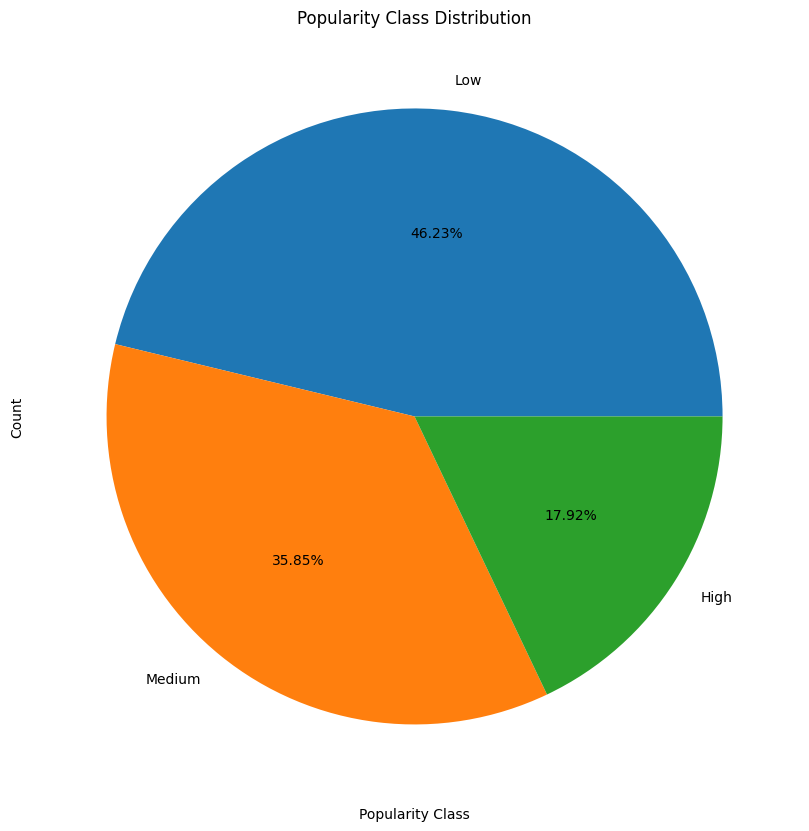

In [19]:
plt.pie(x=df['popularity_class'].value_counts(),labels=['Low','Medium','High'],autopct='%.2f%%')
plt.title('Popularity Class Distribution')
plt.xlabel('Popularity Class')
plt.ylabel('Count')
plt.show()



Univariate Analysis

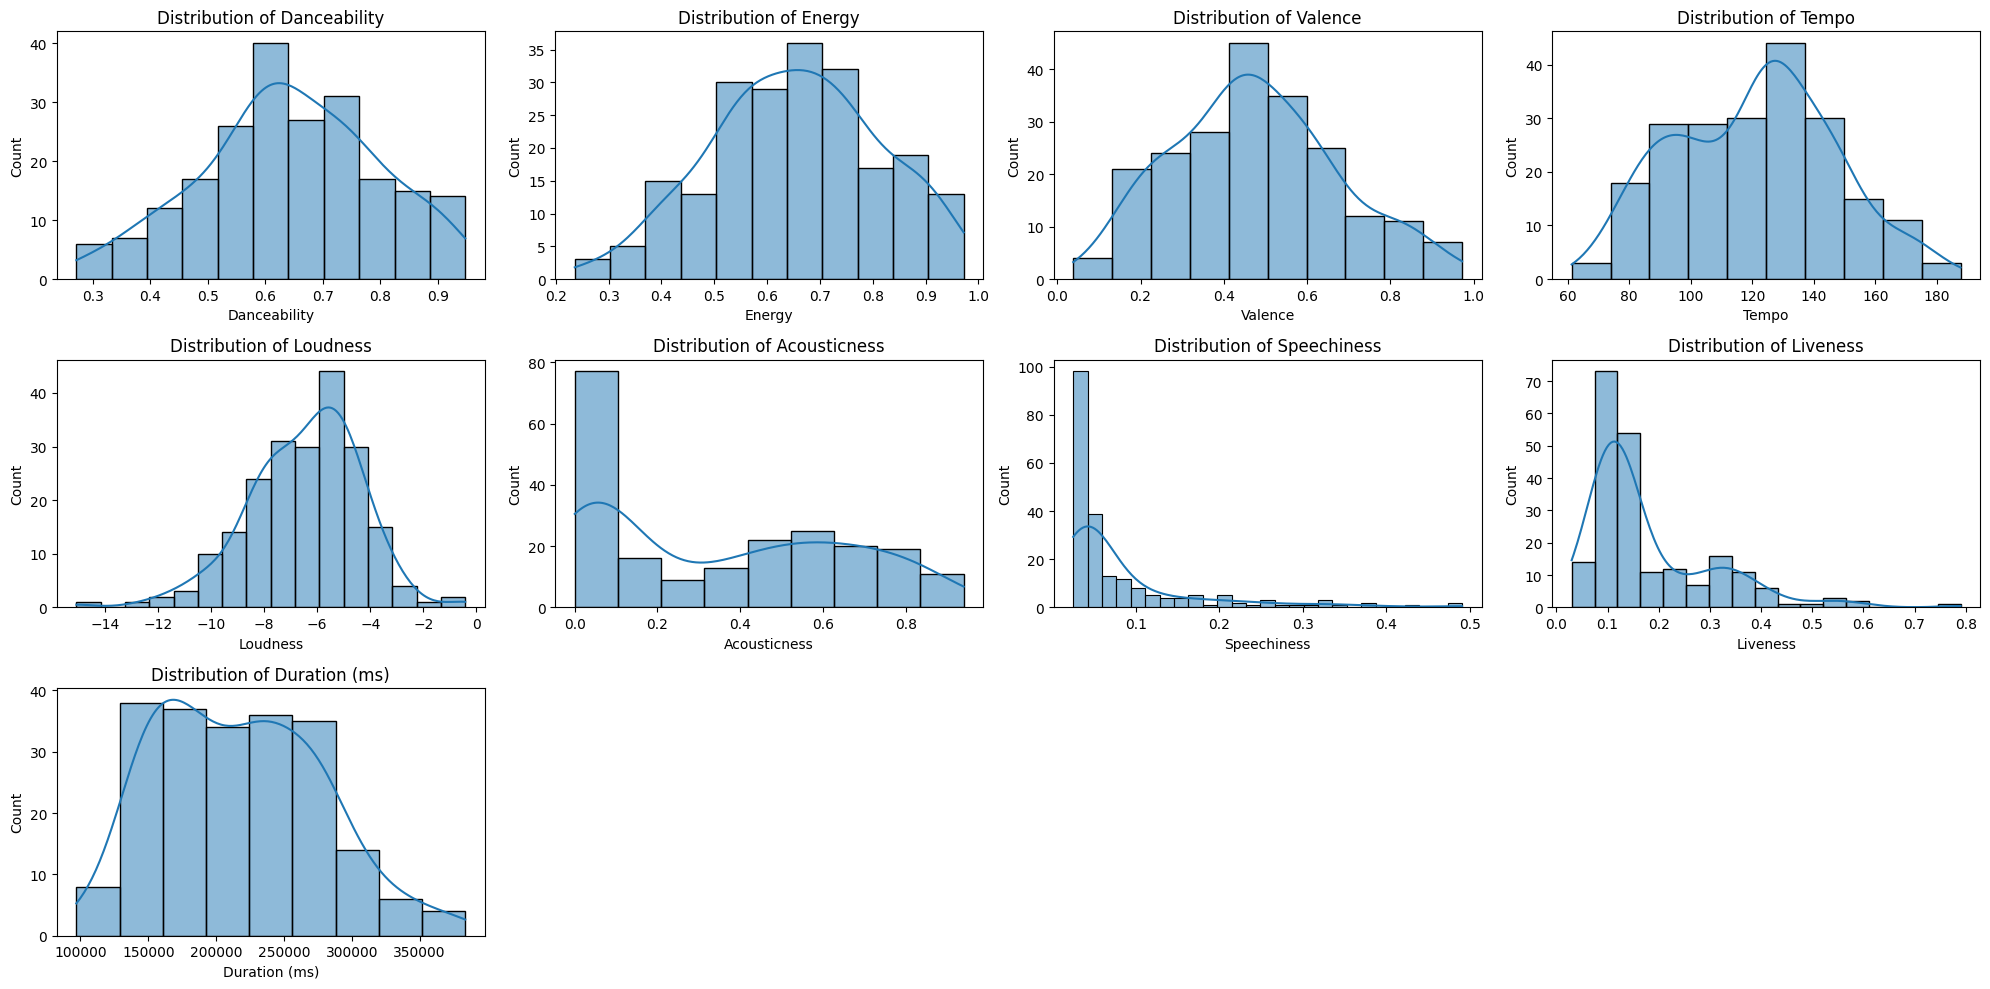

In [20]:
features = ['Danceability','Energy','Valence','Tempo','Loudness',
            'Acousticness','Speechiness','Liveness','Duration (ms)']
t=1
for i in features:
  plt.subplot(3,4,t)
  sns.histplot(df[i],kde=True)
  t+=1
  plt.title(f'Distribution of {i}')
plt.tight_layout()
plt.show()

BIvariate Analysis

Audio Features vs Popularity

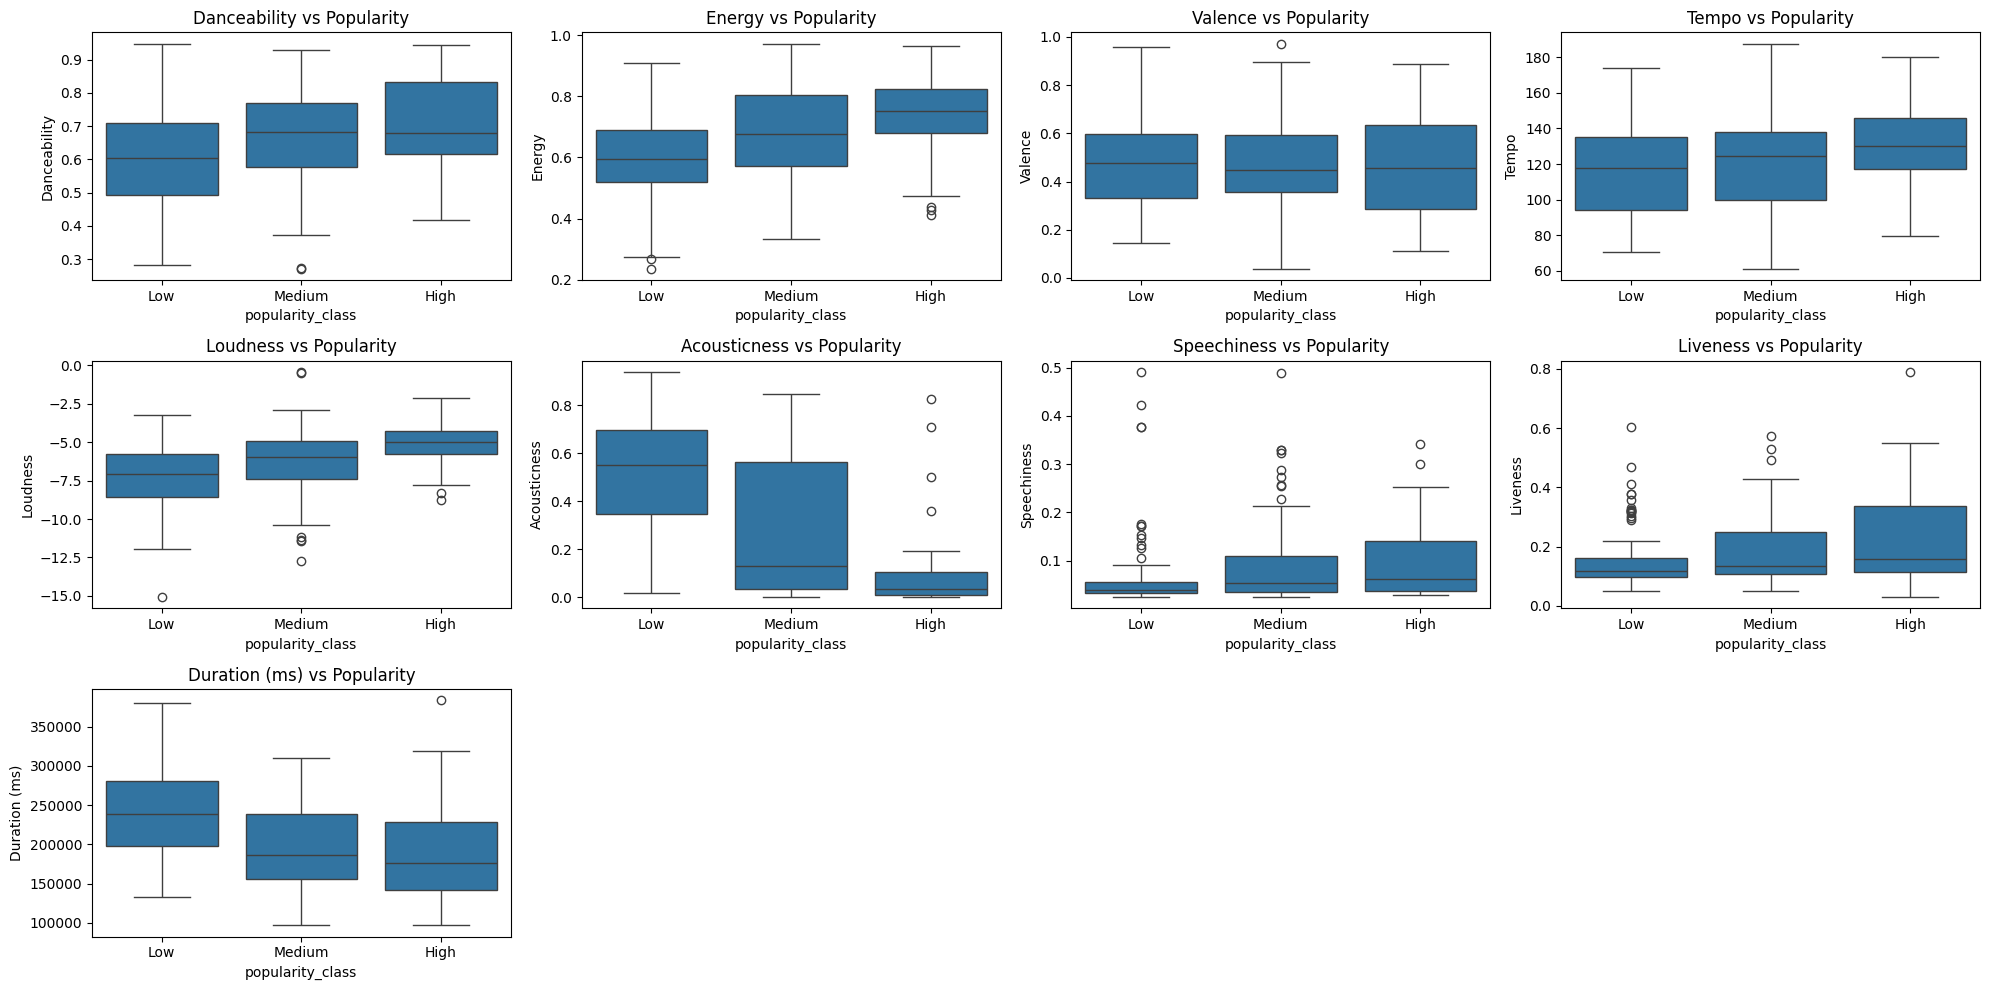

In [21]:
t=1
for i in features:
    plt.subplot(3,4,t)
    sns.boxplot(x=df['popularity_class'], y=df[i])
    t+=1
    plt.title(f"{i} vs Popularity")

plt.tight_layout()
plt.show()



In [36]:

num

['Duration (ms)',
 'Explicit',
 'Danceability',
 'Energy',
 'Key',
 'Loudness',
 'Mode',
 'Speechiness',
 'Acousticness',
 'Instrumentalness',
 'Liveness',
 'Valence',
 'Tempo',
 'popularity_class']

Danceability, energy, and valence show visible relationships with popularity, indicating their importance in predicting listener engagement.

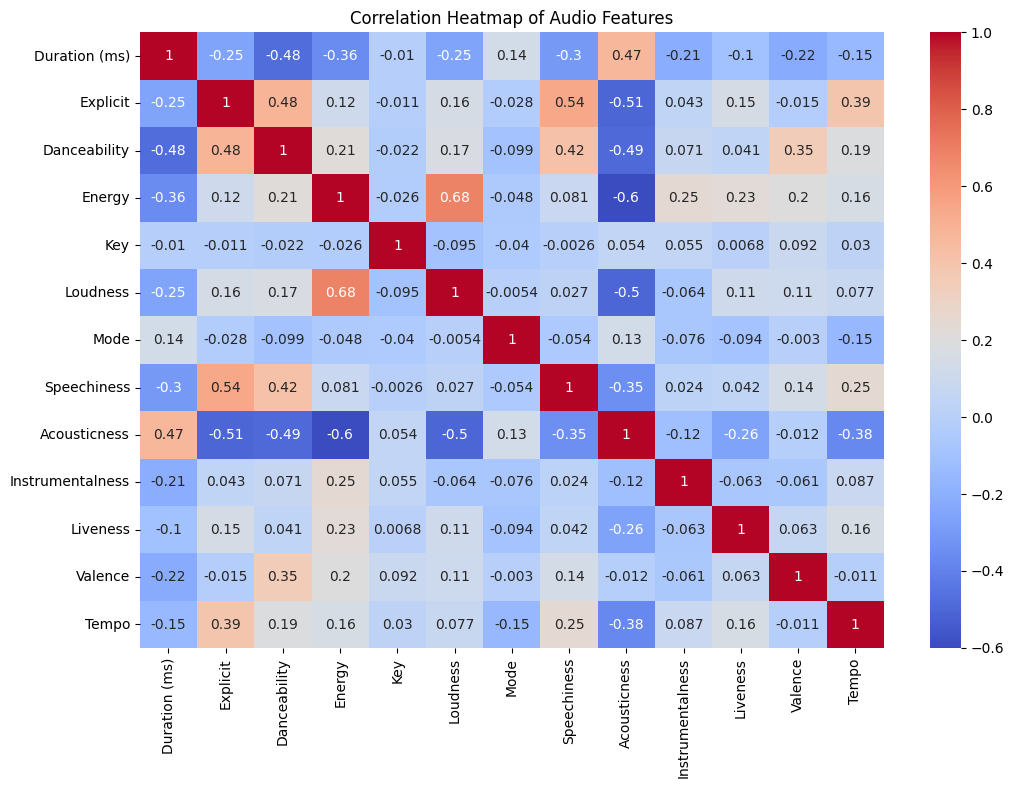

In [40]:
# Select only numeric columns
numeric= df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12,8))


sns.heatmap(numeric.corr(),cmap='coolwarm',annot=True)

plt.title("Correlation Heatmap of Audio Features")
plt.show()


Acousticness	-0.43	Higher acoustic tracks tend to be less popular

Explicit	+0.41	Explicit tracks show higher popularity

Loudness	+0.31	Louder tracks are generally more popular

Danceability	+0.25	Danceable tracks attract more listeners

Energy	+0.25	Energetic songs tend to perform better

- Key insight:
Popularity is influenced more by sound intensity and engagement-related features than by musical theory features.

BASE MODEL

In [41]:
df['popularity_class'].value_counts(normalize=True) * 100


,proportion
popularity_class,
Low,46.226415
Medium,35.849057
High,17.924528


In [42]:

features = [
    'Danceability', 'Energy', 'Valence', 'Tempo', 'Loudness',
    'Acousticness', 'Instrumentalness', 'Speechiness',
    'Liveness', 'Duration (ms)'
]

X = df[features]
y = df['popularity_class']


In [43]:


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [44]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [45]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)
print("Logistic Regression Results")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Results
              precision    recall  f1-score   support

        High       0.29      0.25      0.27         8
         Low       0.59      0.65      0.62        20
      Medium       0.21      0.20      0.21        15

    accuracy                           0.42        43
   macro avg       0.36      0.37      0.36        43
weighted avg       0.40      0.42      0.41        43



In [46]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Results")
print(classification_report(y_test, y_pred_rf))


Random Forest Results
              precision    recall  f1-score   support

        High       0.50      0.38      0.43         8
         Low       0.62      0.65      0.63        20
      Medium       0.31      0.33      0.32        15

    accuracy                           0.49        43
   macro avg       0.48      0.45      0.46        43
weighted avg       0.49      0.49      0.49        43



In [47]:
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=14,
    class_weight="balanced",
    random_state=42
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest TUNED")
print(classification_report(y_test, y_pred_rf))


Random Forest TUNED
              precision    recall  f1-score   support

        High       0.50      0.38      0.43         8
         Low       0.59      0.65      0.62        20
      Medium       0.27      0.27      0.27        15

    accuracy                           0.47        43
   macro avg       0.45      0.43      0.44        43
weighted avg       0.46      0.47      0.46        43



In [48]:
gbr = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)

gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

print("Gradient Boosting Results (FINAL)")
print(classification_report(y_test, y_pred_gbr))


Gradient Boosting Results (FINAL)
              precision    recall  f1-score   support

        High       0.33      0.12      0.18         8
         Low       0.67      0.70      0.68        20
      Medium       0.37      0.47      0.41        15

    accuracy                           0.51        43
   macro avg       0.46      0.43      0.43        43
weighted avg       0.50      0.51      0.50        43



In [ ]:
importances = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

print(importances.head(10))


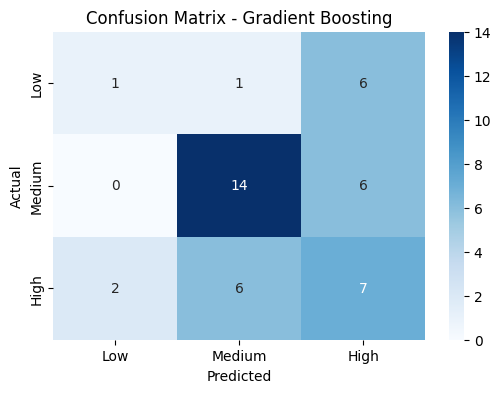

In [49]:
cm = confusion_matrix(y_test, y_pred_gbr)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=['Low','Medium','High'],
            yticklabels=['Low','Medium','High'],
            cmap='Blues')

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()


In [50]:
# Get class probabilities
y_proba = gbr.predict_proba(X_test)

# Get predicted class labels
y_pred = gbr.predict(X_test)


In [51]:
pd.Series(y_pred).value_counts()


,count
Low,21
Medium,19
High,3


In [52]:
import google.generativeai as genai
from google.colab import userdata

api_key=userdata.get('tunerank')
genai.configure(api_key=api_key)

In [53]:
model=genai.GenerativeModel('gemini-2.5-flash-lite')

In [54]:
def build_prompt(predicted_class, confidence):
    return f"""
You are an AI assistant helping a music streaming platform decide how to promote songs.

Model Prediction:
- Popularity Class: {predicted_class}
- Confidence Score: {confidence}

Task:
Generate a short (2–3 sentences), professional promotion recommendation.
The recommendation should help music curators decide how aggressively to promote the song.

Do NOT mention machine learning, models, or probabilities explicitly.
Focus only on actionable promotion advice.
"""


In [55]:
model=genai.GenerativeModel('gemini-2.5-flash-lite')
def generate_promotion_recommendation(prompt):
    response = model.generate_content(prompt)
    return response.text.strip()


In [59]:
pred_df = pd.DataFrame({
    "Predicted_Class": y_pred,
    "Confidence": np.max(y_proba, axis=1)
})


In [60]:
sample_df = (
    pred_df
    .groupby("Predicted_Class", group_keys=False)
    .apply(lambda x: x.sample(min(2, len(x)), random_state=42))
    .reset_index(drop=True)
)

sample_df


,Predicted_Class,Confidence
0,High,0.953011
1,High,0.866193
2,Low,0.991288
3,Low,0.399012
4,Medium,0.989397
5,Medium,0.952374


In [61]:
genai_outputs = []

for idx, row in sample_df.iterrows():
    pred_class = row["Predicted_Class"]
    confidence = round(row["Confidence"], 2)

    prompt = build_prompt(pred_class, confidence)
    recommendation = generate_promotion_recommendation(prompt)

    genai_outputs.append({
        "Predicted_Class": pred_class,
        "Confidence": confidence,
        "GenAI_Recommendation": recommendation
    })

genai_df = pd.DataFrame(genai_outputs)
pd.set_option("display.max_colwidth", None)
genai_df


,Predicted_Class,Confidence,GenAI_Recommendation
0,High,0.95,This song shows significant promise and is likely to resonate strongly with a wide audience. Curators should consider giving it prominent placement on curated playlists and featuring it heavily across key promotional channels to maximize its reach and engagement.
1,High,0.87,This song is strongly resonating with listeners and is a prime candidate for significant promotion. Curators should consider featuring it prominently on key playlists and leveraging it in high-visibility marketing campaigns. Its high engagement suggests it will perform exceptionally well with a broader audience.
2,Low,0.99,"This song shows a strong prediction of low popularity. Curators should exercise caution and consider a minimal promotional approach, perhaps including it in very niche playlists or internal reviews, rather than allocating significant resources to widespread promotion."
3,Low,0.40,"This track shows potential but may not resonate widely with our current user base. Consider a light promotional push, perhaps by including it in curated playlists targeting niche genres or audiences where it might find a more dedicated following. Monitor engagement closely to inform future decisions."
4,Medium,0.99,"This song has strong potential, indicating it will resonate with a significant audience. Curators should consider placing it prominently on genre-specific playlists and featuring it in broader ""new music"" or ""trending"" collections to maximize its reach."
5,Medium,0.95,This song shows strong potential and is likely to resonate with a broad audience. Consider featuring it prominently on curated playlists and in targeted advertising campaigns to maximize its reach and engagement.


TuneRank successfully demonstrates how machine learning and generative AI can be combined to support data-driven decision making in music platforms.
Using audio features alone, the system classifies songs into Low, Medium, and High popularity buckets, addressing cold-start scenarios where user interaction data is unavailable.

A Gradient Boosting classifier was employed to learn non-linear relationships between audio attributes and popularity, producing both class predictions and confidence scores.
These structured outputs were then passed to a Generative AI layer (Gemini), which transformed numeric predictions into human-readable promotion recommendations, enabling actionable insights for music curators and marketing teams.

The results show that while popularity is inherently subjective, audio features provide strong predictive signals.
The addition of Generative AI improves system usability by bridging the gap between technical predictions and business-level decisions.

This project successfully demonstrates how machine learning and generative AI can be combined to support data-driven decision making in the music industry.

Using only audio features, TuneRank classifies songs into Low, Medium, and High popularity categories, addressing cold-start scenarios where post-release user engagement data is unavailable. A Gradient Boosting classifier was used to capture non-linear relationships between audio characteristics and popularity, while prediction confidence was derived from model probabilities.

To enhance interpretability and usability, a Generative AI layer powered by Gemini was integrated to transform model predictions into human-readable promotion recommendations. This hybrid ML–GenAI approach bridges the gap between technical outputs and business-level actions, making the system suitable for real-world content curation and promotion workflows.

Although popularity is influenced by external factors such as marketing and trends, the results show that audio features provide meaningful predictive signals. The proposed system is scalable, extensible, and serves as a strong foundation for future enhancements such as user engagement integration and deployment.
